In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import sys
sys.path.append('E:/Рабочий стол С/python_projects/carpov_courses_python')

from library.visualization.visual_preset import set_visualization_settings
set_visualization_settings()

In [2]:
file_path = '../data/segmentation_data.csv'
df = pd.read_csv(file_path, sep=',')
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [3]:
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [4]:
df.shape

(8068, 11)

In [5]:
df['Ever_Married'].value_counts()

Ever_Married
Yes    4643
No     3285
Name: count, dtype: int64

In [6]:
numeric_columns = df.loc[:, df.dtypes!=np.object_].columns
df.loc[:, df.dtypes!=np.object_].head()

,ID,Age,Work_Experience,Family_Size
0,462809,22,1.0,4.0
1,462643,38,NaN,3.0
2,466315,67,1.0,1.0
3,461735,67,0.0,2.0
4,462669,40,NaN,6.0


In [7]:
categorical_columns = df.loc[:, df.dtypes==np.object_].columns
df.loc[:, df.dtypes==np.object_].head()

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
0,Male,No,No,Healthcare,Low,Cat_4,D
1,Female,Yes,Yes,Engineer,Average,Cat_4,A
2,Female,Yes,Yes,Engineer,Low,Cat_6,B
3,Male,Yes,Yes,Lawyer,High,Cat_6,B
4,Female,Yes,Yes,Entertainment,High,Cat_6,A


In [8]:
df = df.set_index('ID')
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
ID,,,,,,,,,,
462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D


In [9]:
from library.data_processing.feature_to_type import numeric_categorical_columns
numeric_columns, categorical_columns = numeric_categorical_columns(df)

### EDA

In [10]:
df.describe()

,Age,Work_Experience,Family_Size
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [11]:
### Заполнеяем пропуски 
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())

In [12]:
df[numeric_columns].corr()

,Age,Work_Experience,Family_Size
Age,1.000000,-0.179361,-0.273291
Work_Experience,-0.179361,1.000000,-0.058702
Family_Size,-0.273291,-0.058702,1.000000


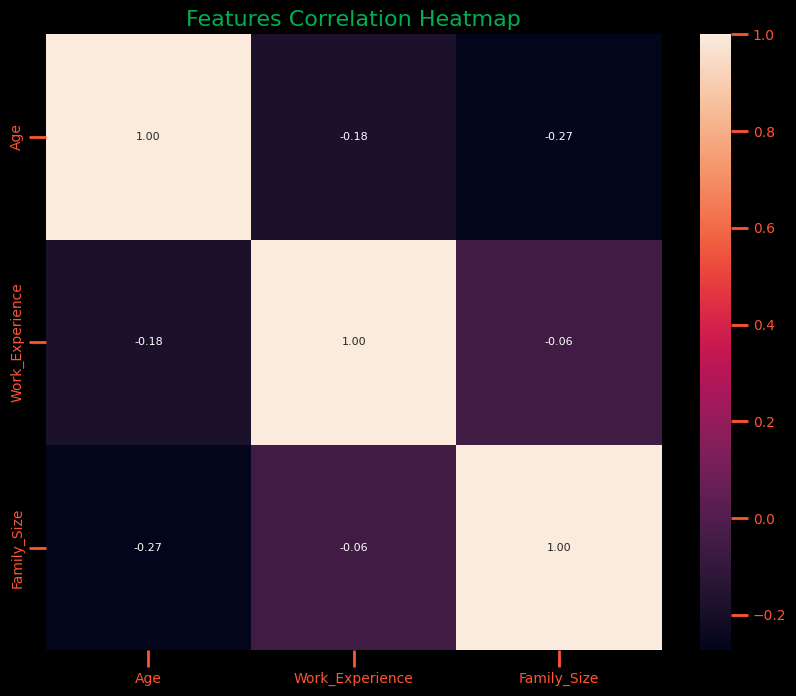

In [13]:
# plot a heatmap to display +ve and -ve correlation among features and regression label:

import seaborn as sns
cm = np.corrcoef(df[numeric_columns].values.T)
# sns.set(font_scale=1.0)
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=numeric_columns, xticklabels=numeric_columns)
plt.title('Features Correlation Heatmap')
plt.show()

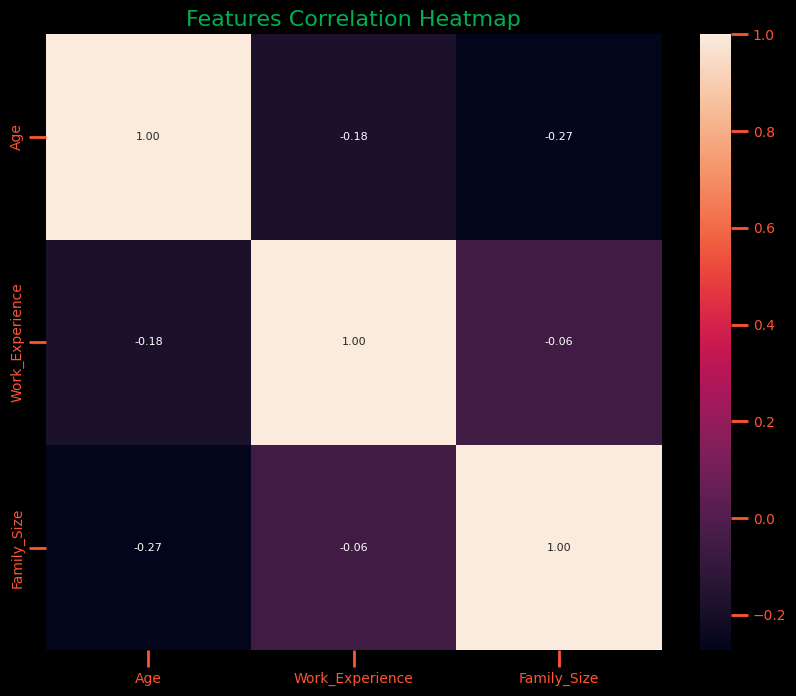

In [14]:
from library.visualization.HeatMap import plot_correlation_heatmap

plot_correlation_heatmap(df)

In [15]:
from library.data_processing.correlations import print_top_abs_correlations
print_top_abs_correlations(df[numeric_columns], n=5)

Top Absolute Correlations:
         Feature 1        Feature 2  Correlation
0              Age      Family_Size     0.273291
1              Age  Work_Experience     0.179361
2  Work_Experience      Family_Size     0.058702


In [16]:
from sklearn.feature_selection import VarianceThreshold
from library.data_processing.constant_features import drop_constant_features
data, constant_cols = drop_constant_features(df[numeric_columns], threshold=0)

if constant_cols == []:
    print("Empty")

Empty


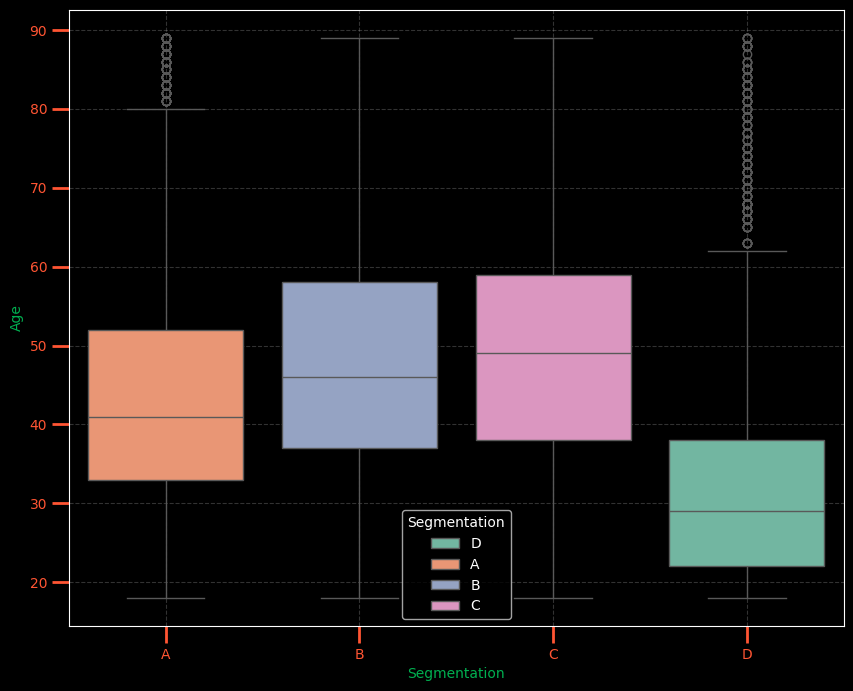

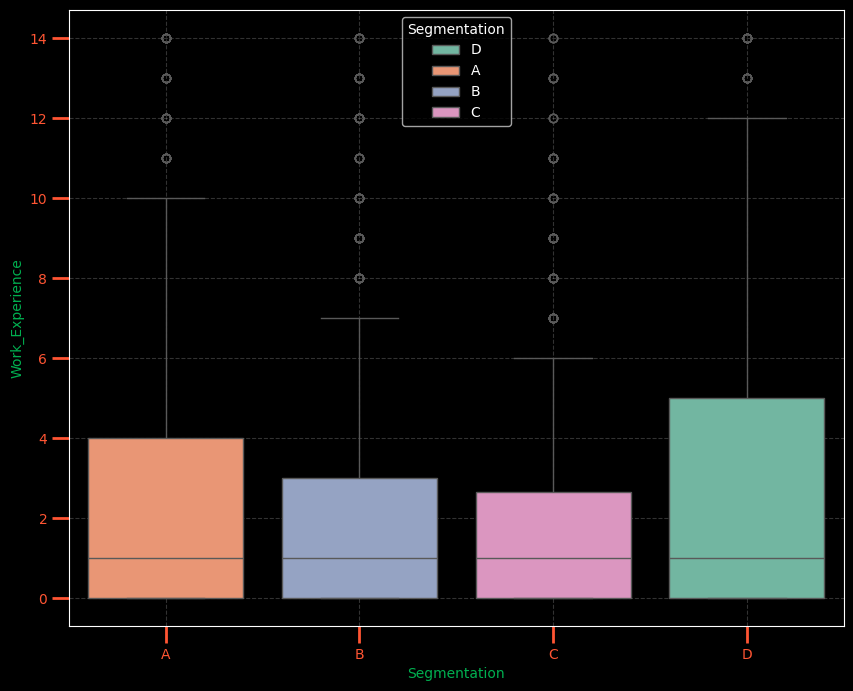

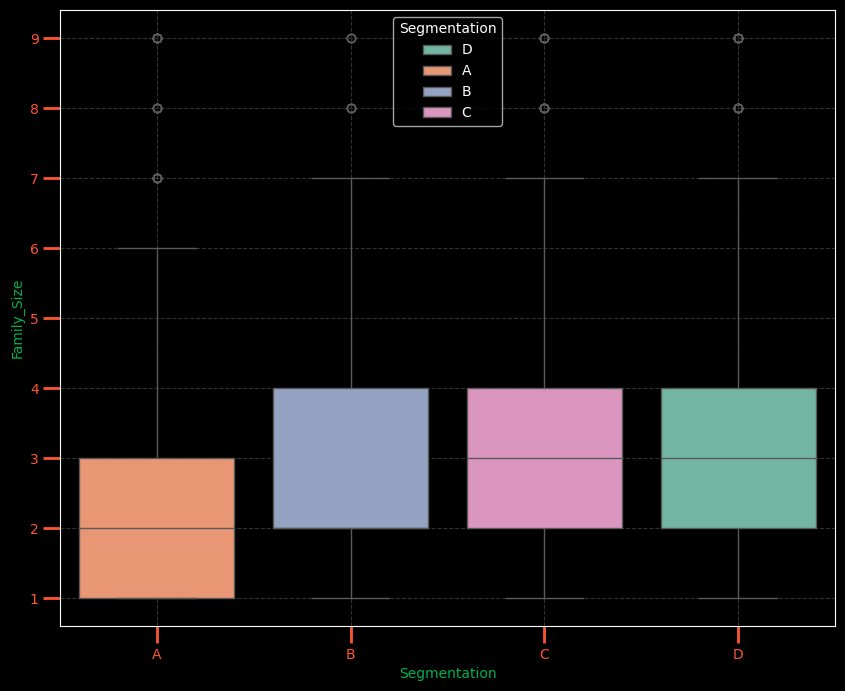

In [17]:
import seaborn as sns 

for col in numeric_columns:
    fig = plt.figure()
    fig.set_size_inches(10, 8)
    sns.boxplot(y=col, x=df['Segmentation'].astype('category'), data=df, hue='Segmentation', palette='Set2', legend=True) 
    plt.grid(True, alpha=0.2, linestyle="--")
    plt.show()


In [18]:
df.describe(include=object)

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4643,4968,2516,4878,5238,2268


In [19]:
### Заполняем пропуски самым популярным классом

for col in categorical_columns:
    most_recent = df.groupby(col).size().sort_values().index[-1]
    df[col] = df[col].fillna(most_recent)

df.describe(include=object)

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,8068,8068,8068,8068,8068,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4783,5046,2640,4878,5314,2268


In [20]:
df.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

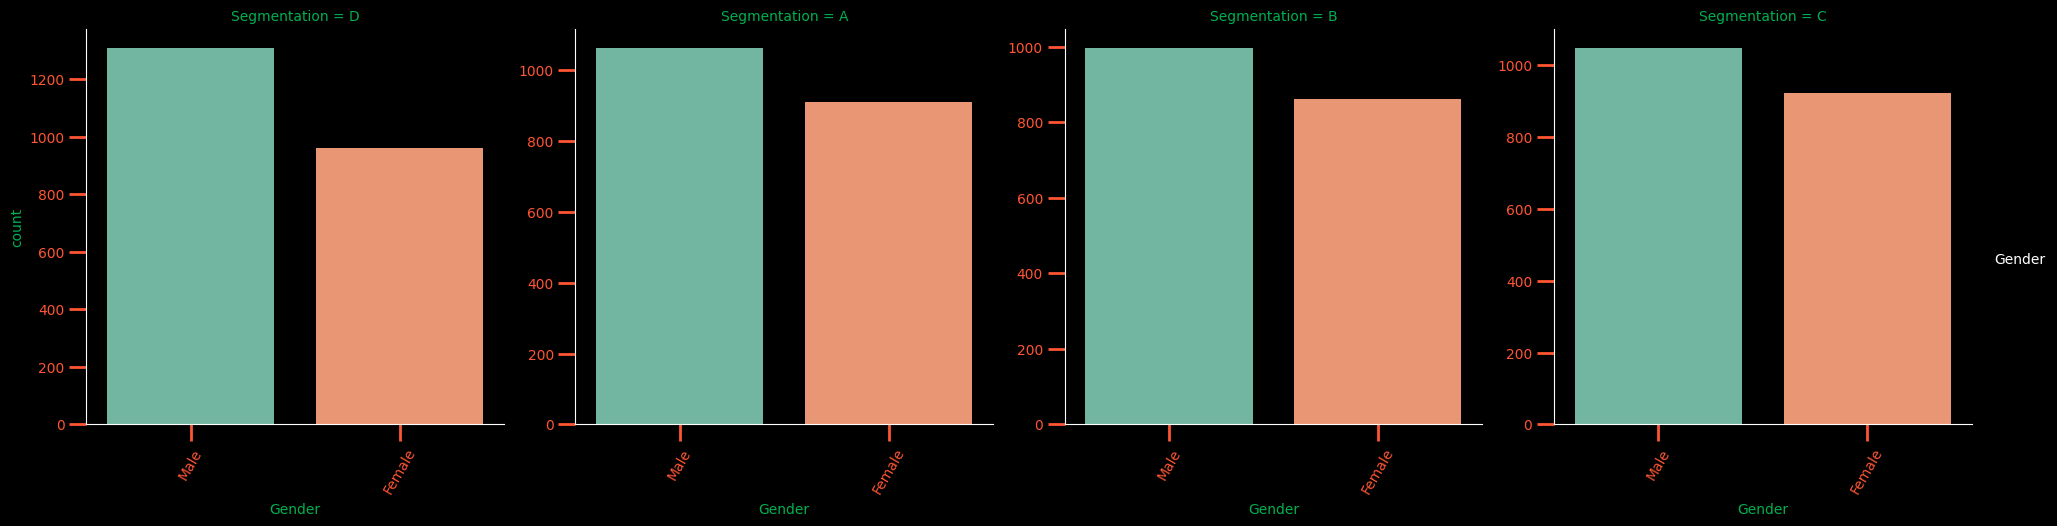

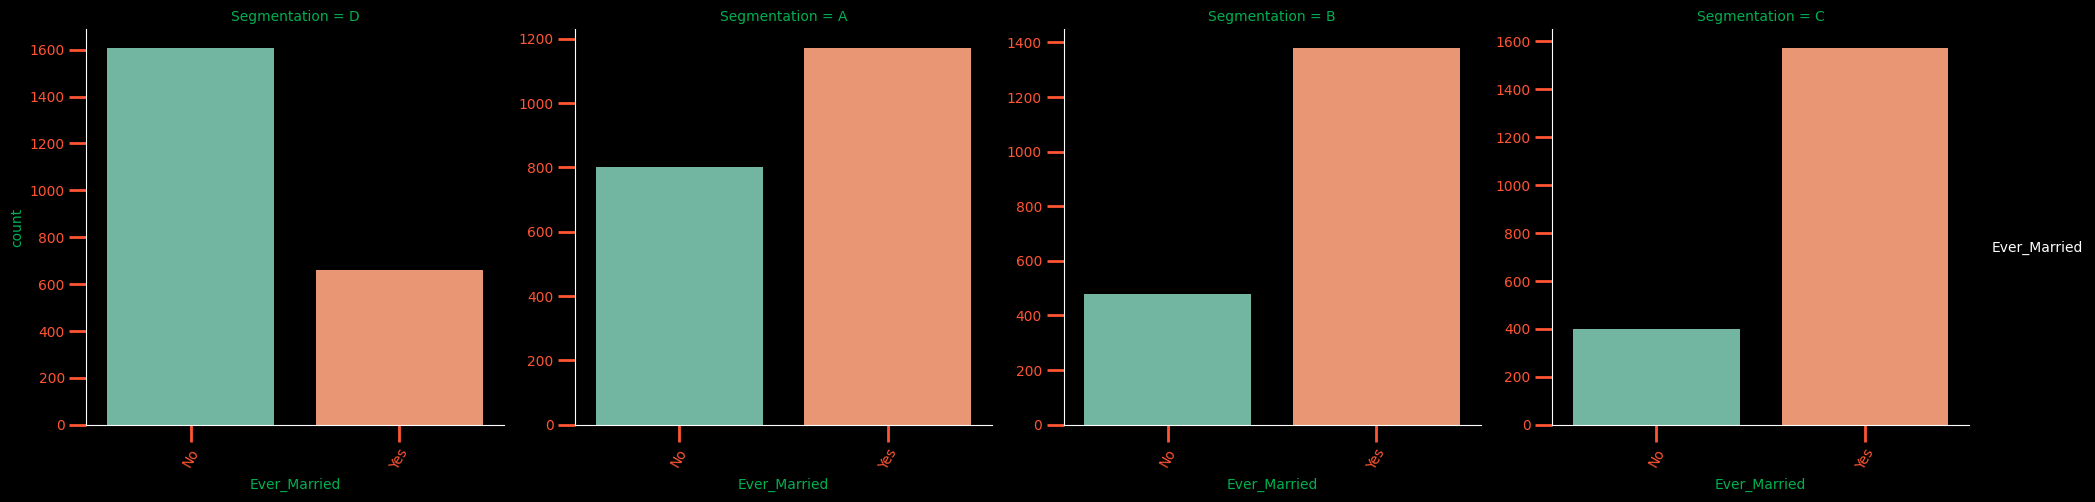

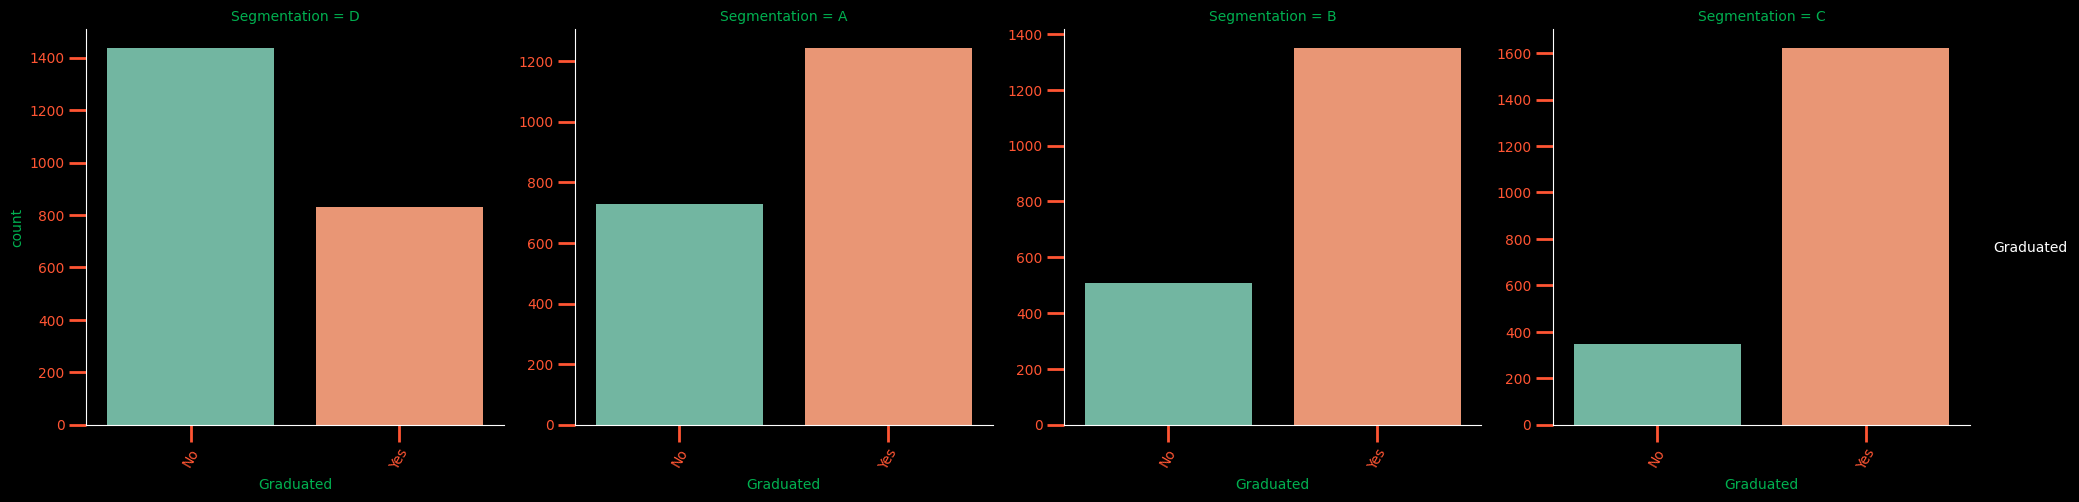

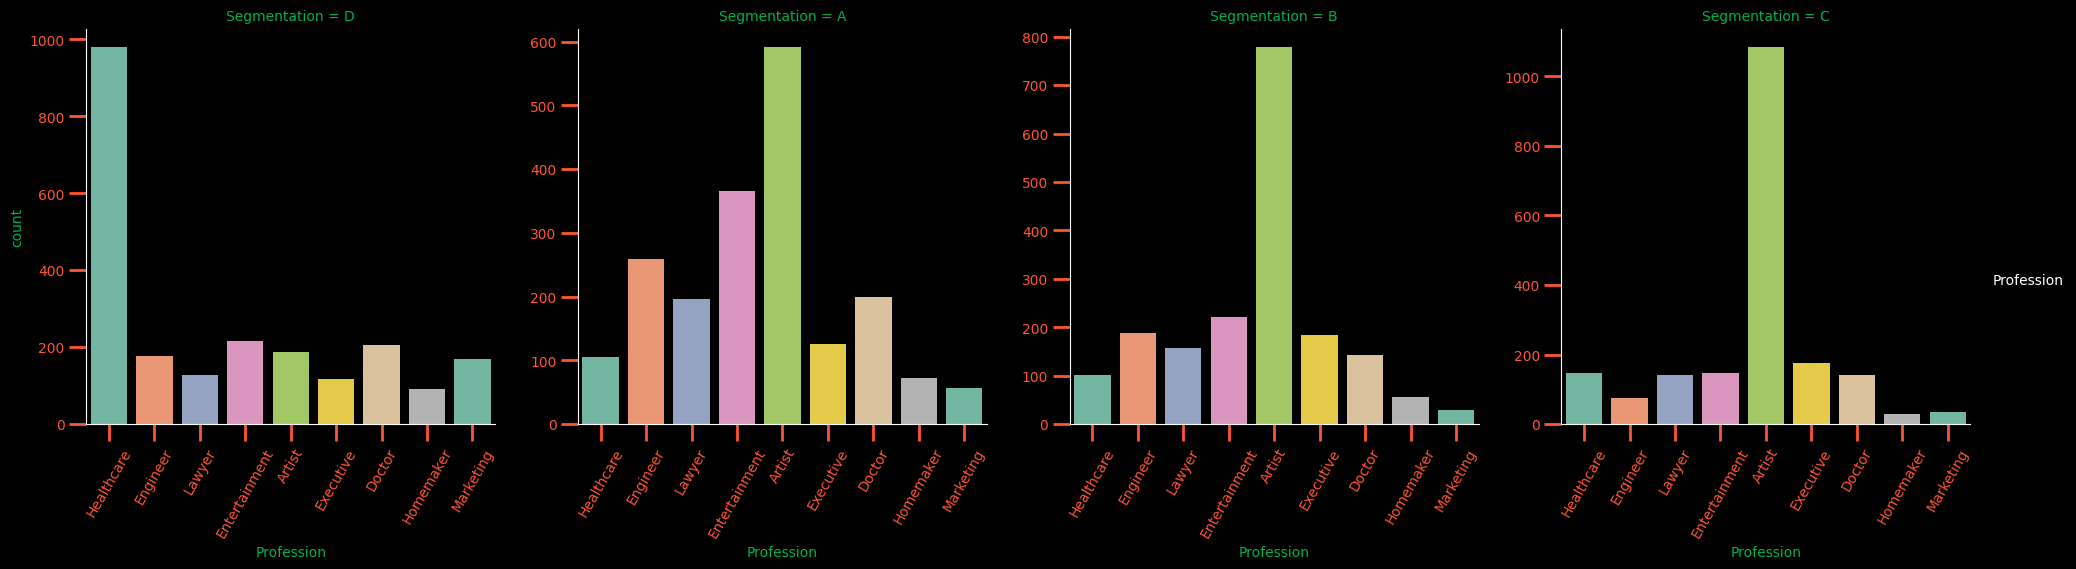

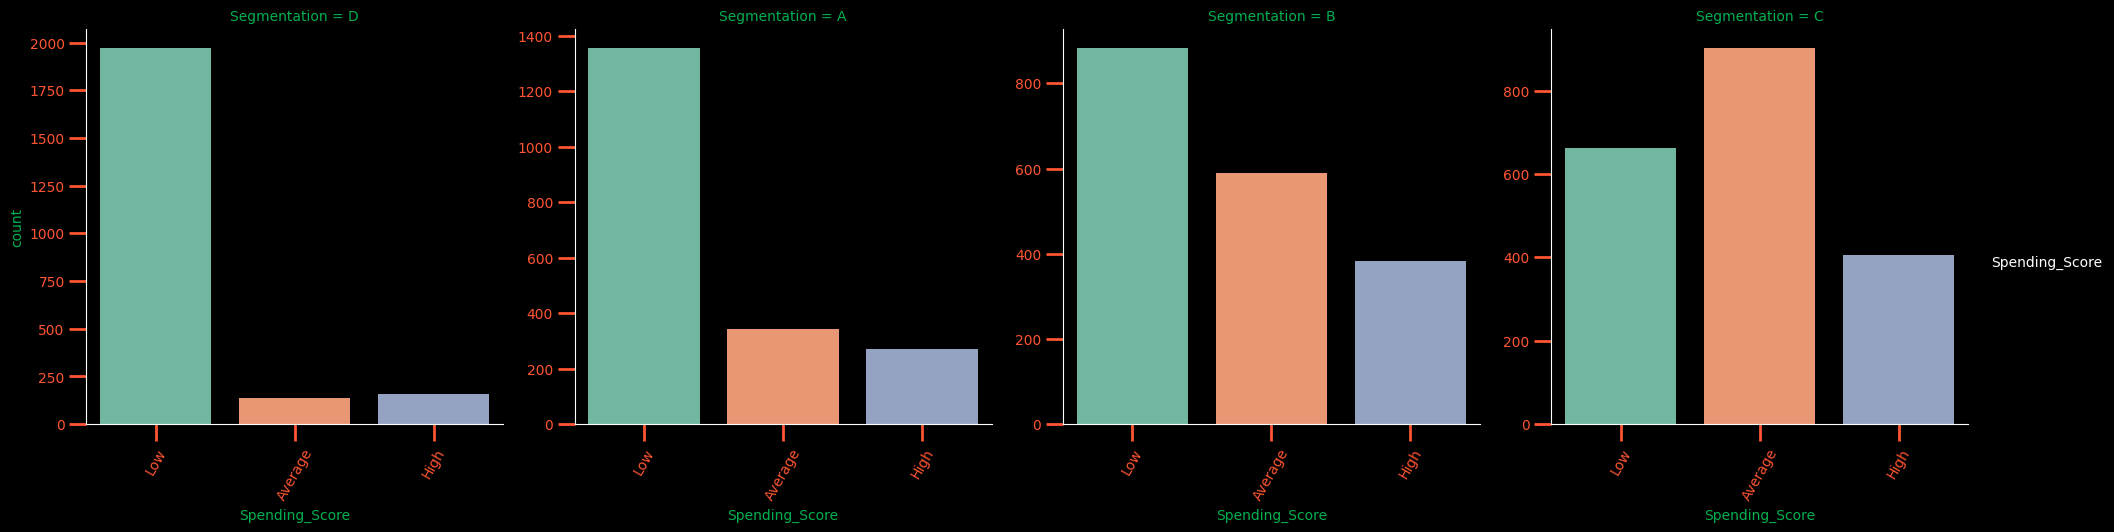

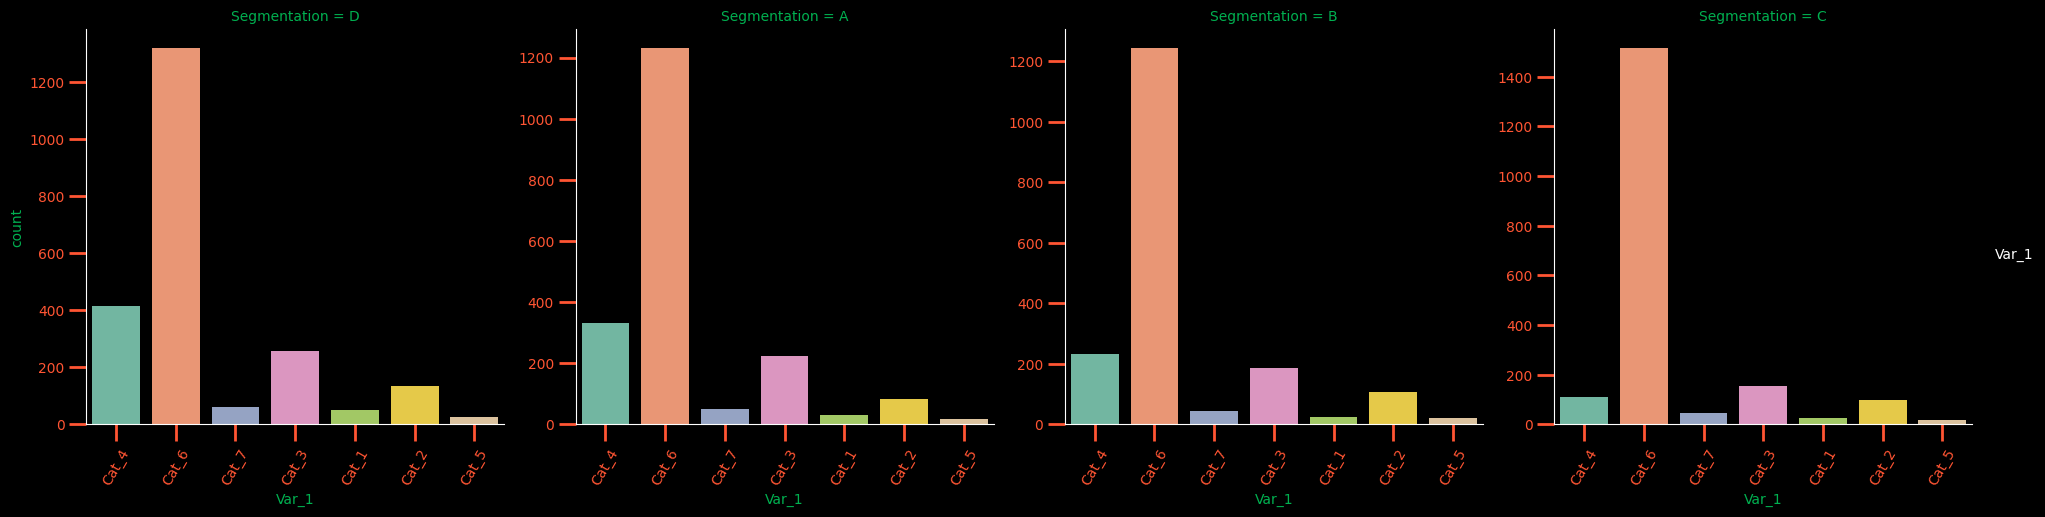

In [21]:
for col in categorical_columns:
    if col != 'Segmentation':

        g = sns.catplot(x=col,
                        kind='count',
                        col='Segmentation',
                        hue=col,
                        data=df,
                        palette='Set2',
                        sharey=False,
                        stat='count')
        g.set_xticklabels(rotation=60)
        plt.show()


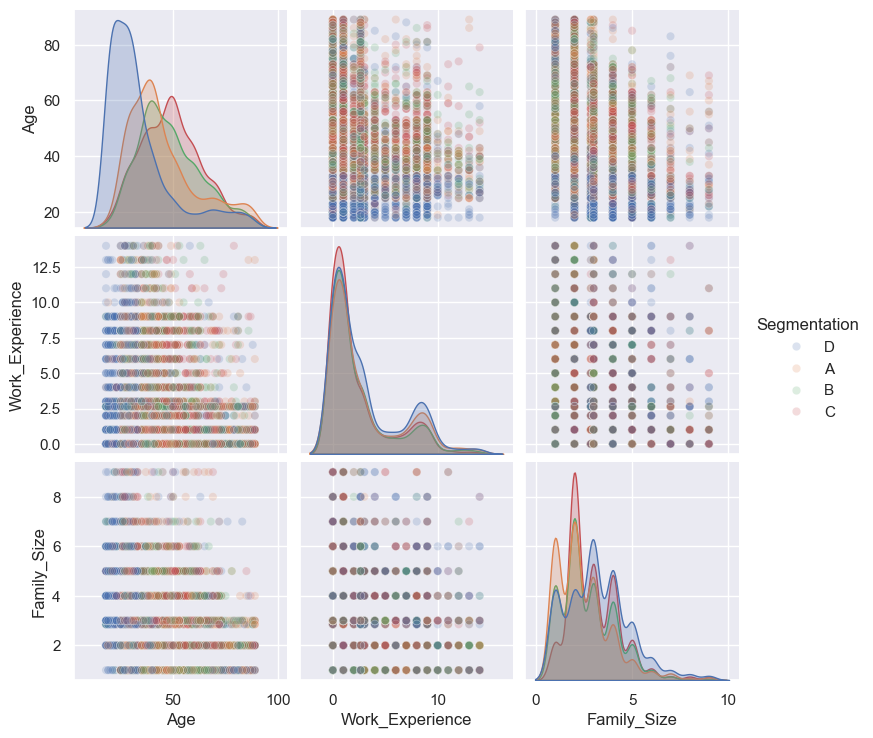

<Figure size 2000x2000 with 0 Axes>

In [22]:
from library.visualization.HeatMap import plot_scatter_matrix

plot_scatter_matrix(df, 'Segmentation')

In [22]:
from library.data_processing.encoding import CategoricalTransformer

transformer = CategoricalTransformer(df, 'Segmentation')


In [23]:
def encode_multiclass_target(df, category, target):
    df = df[[category, target]].copy()

    target_dummies = pd.get_dummies(df[target],
                                    prefix=category,
                                    drop_first=True)
    
    df = pd.concat((df, target_dummies), axis=1)

    for tg in target_dummies.columns:

        df[tg] = df.groupby(category)[tg].transform("mean")

    return df.drop(category, axis=1)

In [24]:
encode_multiclass_target(df, 'Gender', 'Segmentation')

,Segmentation,Gender_B,Gender_C,Gender_D
ID,,,,
462809,D,0.225719,0.237265,0.296355
462643,A,0.235826,0.252534,0.262668
466315,B,0.235826,0.252534,0.262668
461735,B,0.225719,0.237265,0.296355
462669,A,0.235826,0.252534,0.262668
...,...,...,...,...
464018,D,0.225719,0.237265,0.296355
464685,D,0.225719,0.237265,0.296355
465406,D,0.235826,0.252534,0.262668


In [25]:
df.describe(include='object')

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,8068,8068,8068,8068,8068,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4783,5046,2640,4878,5314,2268


In [26]:
tmp = [col for col in categorical_columns if col != 'Segmentation']
for col in tmp:
    if df[col].nunique() < 4:
        one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True)
        one_hot.replace({False: 0, True: 1}, inplace=True)
        df = pd.concat((df.drop(col, axis=1), one_hot), axis=1)

    else:
        mean_target = encode_multiclass_target(df, col, 'Segmentation').drop('Segmentation', axis=1)
        df = pd.concat((df.drop(col, axis=1), mean_target), axis=1)

In [27]:
file_path = '../data/segmentation_data_redone.csv'
df.to_csv(file_path, sep=',')
tmp = pd.read_csv(file_path, sep=',')
tmp

,ID,Age,Work_Experience,Family_Size,Segmentation,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_B,Profession_C,Profession_D,Spending_Score_High,Spending_Score_Low,Var_1_B,Var_1_C,Var_1_D
0,462809,22,1.000000,4.0,D,1,0,0,0.075826,0.109610,0.734985,0,1,0.213039,0.100092,0.381084
1,462643,38,2.641663,3.0,A,0,1,1,0.270386,0.107296,0.251788,0,0,0.213039,0.100092,0.381084
2,466315,67,1.000000,1.0,B,0,1,1,0.270386,0.107296,0.251788,0,1,0.234287,0.285472,0.248400
3,461735,67,0.000000,2.0,B,1,1,1,0.253612,0.224719,0.205457,1,0,0.234287,0.285472,0.248400
4,462669,40,2.641663,6.0,A,0,1,1,0.232877,0.155954,0.226554,1,0,0.234287,0.285472,0.248400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,22,0.000000,7.0,D,1,0,0,0.294697,0.410227,0.071212,0,1,0.195489,0.195489,0.375940
8064,464685,35,3.000000,4.0,D,1,0,0,0.305509,0.292154,0.193656,0,1,0.213039,0.100092,0.381084
8065,465406,33,1.000000,1.0,D,0,0,1,0.075826,0.109610,0.734985,0,1,0.234287,0.285472,0.248400
8066,467299,27,1.000000,4.0,B,0,0,1,0.075826,0.109610,0.734985,0,1,0.234287,0.285472,0.248400


In [29]:
X = df.drop('Segmentation', axis=1)
Y = df['Segmentation']

In [30]:
Y.head()

ID
462809    D
462643    A
466315    B
461735    B
462669    A
Name: Segmentation, dtype: object

In [31]:
### Балансированы ли классы

Y.value_counts()

Segmentation
D    2268
A    1972
C    1970
B    1858
Name: count, dtype: int64

In [32]:
### Применим ONE VS ALL

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    random_state=0,
                                                    test_size=0.2)

In [33]:
#from sklearn.preprocessing import LabelEncoder

# Создайте экземпляр LabelEncoder
#label_encoder = LabelEncoder()

# Преобразуйте строковые метки классов в числовые
#Y_train = label_encoder.fit_transform(Y_train)

In [34]:
from sklearn.multiclass import OneVsRestClassifier ### ONE VS ALL
from sklearn.linear_model import SGDClassifier

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('one_vs_all', OneVsRestClassifier(SGDClassifier(loss='log_loss')))
])

pipe.fit(X_train, Y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('one_vs_all',
                 OneVsRestClassifier(estimator=SGDClassifier(loss='log_loss')))])

In [35]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('one_vs_all',
   OneVsRestClassifier(estimator=SGDClassifier(loss='log_loss')))],
 'verbose': False,
 'scaler': StandardScaler(),
 'one_vs_all': OneVsRestClassifier(estimator=SGDClassifier(loss='log_loss')),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'one_vs_all__estimator__alpha': 0.0001,
 'one_vs_all__estimator__average': False,
 'one_vs_all__estimator__class_weight': None,
 'one_vs_all__estimator__early_stopping': False,
 'one_vs_all__estimator__epsilon': 0.1,
 'one_vs_all__estimator__eta0': 0.0,
 'one_vs_all__estimator__fit_intercept': True,
 'one_vs_all__estimator__l1_ratio': 0.15,
 'one_vs_all__estimator__learning_rate': 'optimal',
 'one_vs_all__estimator__loss': 'log_loss',
 'one_vs_all__estimator__max_iter': 1000,
 'one_vs_all__estimator__n_iter_no_change': 5,
 'one_vs_all__estimator__n_jobs': None,
 'one_vs_all__estimator__penalty': 'l2',
 'one_vs_all__estimator__power_t': 0.5,
 'o

In [36]:
print(pipe.classes_)
print(pipe.predict(X_test.head(1)))

print(pipe.decision_function(X_test.head(1)))

print(pipe.predict_proba(X_test.head(1)))

['A' 'B' 'C' 'D']
['C']
[[-2.02437231 -1.18442284 -0.66765259 -3.16276197]]
[[0.15970065 0.32066421 0.46407161 0.05556353]]


In [37]:
print(np.mean(pipe.predict(X_test) == Y_test),
      np.mean(pipe.predict(X_train) == Y_train))

0.47273853779429986 0.4900836690424543


In [38]:
### Переберем различные параметры базовых моделей 

from sklearn.model_selection import GridSearchCV

param_grid = {
    'one_vs_all__estimator__loss': ['hinge',
                                    'log_loss',
                                    'modified_huber',
                                    'squared_hinge',
                                    'perceptron'],
    'one_vs_all__estimator__penalty': ['l1',
                                       'l2',
                                       'elasticnet'],
    'one_vs_all__estimator__alpha': [0.001, 0.01, 0.1, 0.5, 1, 10]
}

from sklearn.model_selection import PredefinedSplit

test_fold = [0 if x in X_train.index else -1 for x in X.index]
ps = PredefinedSplit(test_fold)

search = GridSearchCV(pipe, param_grid, cv=ps)

search.fit(X, Y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)


Best parameter (CV score=0.49923):
{'one_vs_all__estimator__alpha': 0.001, 'one_vs_all__estimator__loss': 'log_loss', 'one_vs_all__estimator__penalty': 'l2'}


In [39]:
search.get_params()

{'cv': PredefinedSplit(test_fold=array([ 0,  0, ...,  0, -1])),
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('scaler', StandardScaler()),
  ('one_vs_all',
   OneVsRestClassifier(estimator=SGDClassifier(loss='log_loss')))],
 'estimator__verbose': False,
 'estimator__scaler': StandardScaler(),
 'estimator__one_vs_all': OneVsRestClassifier(estimator=SGDClassifier(loss='log_loss')),
 'estimator__scaler__copy': True,
 'estimator__scaler__with_mean': True,
 'estimator__scaler__with_std': True,
 'estimator__one_vs_all__estimator__alpha': 0.0001,
 'estimator__one_vs_all__estimator__average': False,
 'estimator__one_vs_all__estimator__class_weight': None,
 'estimator__one_vs_all__estimator__early_stopping': False,
 'estimator__one_vs_all__estimator__epsilon': 0.1,
 'estimator__one_vs_all__estimator__eta0': 0.0,
 'estimator__one_vs_all__estimator__fit_intercept': True,
 'estimator__one_vs_all__estimator__l1_ratio': 0.15,
 'estimator__one_vs_all__estimator__learning_rat

In [40]:
from sklearn.multiclass import OneVsOneClassifier ### ALL VS ALL
from sklearn.linear_model import SGDClassifier

pipe_all_all = Pipeline([
    ('scaler', StandardScaler()),
    ('all_vs_all', OneVsOneClassifier(SGDClassifier(loss='log_loss')))
])

pipe_all_all.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('all_vs_all',
                 OneVsOneClassifier(estimator=SGDClassifier(loss='log_loss')))])

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'all_vs_all__estimator__loss': ['hinge',
                                    'log_loss',
                                    'modified_huber',
                                    'squared_hinge',
                                    'perceptron'],
    'all_vs_all__estimator__penalty': ['l1',
                                       'l2',
                                       'elasticnet'],
    'all_vs_all__estimator__alpha': [0.001, 0.01, 0.1, 0.5, 1, 10]
}

from sklearn.model_selection import PredefinedSplit

test_fold = [0 if x in X_train.index else -1 for x in X.index]
ps = PredefinedSplit(test_fold)

search = GridSearchCV(pipe_all_all, param_grid, cv=ps)

search.fit(X, Y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)


Best parameter (CV score=0.49721):
{'all_vs_all__estimator__alpha': 0.5, 'all_vs_all__estimator__loss': 'hinge', 'all_vs_all__estimator__penalty': 'l2'}


### Feature generation

In [44]:
X_polinomial = X.copy()

for col in numeric_columns:
    for power in [2, 3, 4]:

        to_add = (X_polinomial[col]**power).to_frame().rename({col:f"{col}_{power}"}, axis=1)
        X_polinomial = pd.concat((X_polinomial, to_add), axis=1)


In [45]:
X_polinomial

,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_B,Profession_C,Profession_D,Spending_Score_High,...,Var_1_D,Age_2,Age_3,Age_4,Work_Experience_2,Work_Experience_3,Work_Experience_4,Family_Size_2,Family_Size_3,Family_Size_4
ID,,,,,,,,,,,,,,,,,,,,,
462809,22,1.000000,4.0,1,0,0,0.075826,0.109610,0.734985,0,...,0.381084,484,10648,234256,1.000000,1.000000,1.000000,16.0,64.0,256.0
462643,38,2.641663,3.0,0,1,1,0.270386,0.107296,0.251788,0,...,0.381084,1444,54872,2085136,6.978385,18.434542,48.697851,9.0,27.0,81.0
466315,67,1.000000,1.0,0,1,1,0.270386,0.107296,0.251788,0,...,0.248400,4489,300763,20151121,1.000000,1.000000,1.000000,1.0,1.0,1.0
461735,67,0.000000,2.0,1,1,1,0.253612,0.224719,0.205457,1,...,0.248400,4489,300763,20151121,0.000000,0.000000,0.000000,4.0,8.0,16.0
462669,40,2.641663,6.0,0,1,1,0.232877,0.155954,0.226554,1,...,0.248400,1600,64000,2560000,6.978385,18.434542,48.697851,36.0,216.0,1296.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464018,22,0.000000,7.0,1,0,0,0.294697,0.410227,0.071212,0,...,0.375940,484,10648,234256,0.000000,0.000000,0.000000,49.0,343.0,2401.0
464685,35,3.000000,4.0,1,0,0,0.305509,0.292154,0.193656,0,...,0.381084,1225,42875,1500625,9.000000,27.000000,81.000000,16.0,64.0,256.0
465406,33,1.000000,1.0,0,0,1,0.075826,0.109610,0.734985,0,...,0.248400,1089,35937,1185921,1.000000,1.000000,1.000000,1.0,1.0,1.0


In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'all_vs_all__estimator__loss': ['hinge',
                                    'log_loss',
                                    'modified_huber',
                                    'squared_hinge',
                                    'perceptron'],
    'all_vs_all__estimator__penalty': ['l1',
                                       'l2',
                                       'elasticnet'],
    'all_vs_all__estimator__alpha': [0.001, 0.01, 0.1, 0.5, 1, 10]
}

from sklearn.model_selection import PredefinedSplit

test_fold = [0 if x in X_train.index else -1 for x in X.index]
ps = PredefinedSplit(test_fold)

search = GridSearchCV(pipe_all_all, param_grid, cv=ps)

search.fit(X_polinomial, Y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=0.50930):
{'all_vs_all__estimator__alpha': 0.01, 'all_vs_all__estimator__loss': 'modified_huber', 'all_vs_all__estimator__penalty': 'elasticnet'}


In [47]:
search.get_params()

{'cv': PredefinedSplit(test_fold=array([ 0,  0, ...,  0, -1])),
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('scaler', StandardScaler()),
  ('all_vs_all',
   OneVsOneClassifier(estimator=SGDClassifier(loss='log_loss')))],
 'estimator__verbose': False,
 'estimator__scaler': StandardScaler(),
 'estimator__all_vs_all': OneVsOneClassifier(estimator=SGDClassifier(loss='log_loss')),
 'estimator__scaler__copy': True,
 'estimator__scaler__with_mean': True,
 'estimator__scaler__with_std': True,
 'estimator__all_vs_all__estimator__alpha': 0.0001,
 'estimator__all_vs_all__estimator__average': False,
 'estimator__all_vs_all__estimator__class_weight': None,
 'estimator__all_vs_all__estimator__early_stopping': False,
 'estimator__all_vs_all__estimator__epsilon': 0.1,
 'estimator__all_vs_all__estimator__eta0': 0.0,
 'estimator__all_vs_all__estimator__fit_intercept': True,
 'estimator__all_vs_all__estimator__l1_ratio': 0.15,
 'estimator__all_vs_all__estimator__learning_rate'

### Макро и Микро - Метрики

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(f"""Precision равно: {precision_score(Y_test,
                                            pipe_all_all.predict(X_test),
                                            average='macro'):3f}""")

print(f"""Recall равно: {recall_score(Y_test,
                                      pipe_all_all.predict(X_test),
                                      average='macro'):3f}""")

print(f"""F-мера равно: {f1_score(Y_test,
                                  pipe_all_all.predict(X_test),
                                  average='macro'):3f}""")

Precision равно: 0.489051
Recall равно: 0.483169
F-мера равно: 0.480883
